# Experiment: Fit Psytrack Features

**Goal**: Using the multi class model and new train threshold dataset, fit a model with psytrack features + previous violation 



Related notebooks:

* `2024_02_15_EXP_fit_psytrack_features.ipynb`

## Imports

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment_sigma_sweep import ExperimentSigmaSweep
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression
from multiglm.visualizations.model_visualizer import ModelVisualizer
from multiglm.features.design_matrix_generator import DesignMatrixGeneratorPrevViolations
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model Configs

In [13]:
model_config = {
    "psytrack_features": {  # MODEL 1
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorPrevViolations,
        "filter_implementation": None,  # no filter & column drop is done by dmg
    }
}

params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": None,
    "model_config": model_config,
    "min_training_stage": 4,
}

save_name = "2024_02_14_fit_prev_violation.pkl"

## Run

In [14]:
experiment = ExperimentSigmaSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']
minimum training stage is  4

 >>>> evaluating animal W051 <<<<

 ***** evaluating model psytrack_features w/ sigma 0.07 *****
Optimization terminated successfully.
         Current function value: 64817.693634
         Iterations: 28
         Function evaluations: 44
         Gradient evaluations: 44

 ***** evaluating model psytrack_features w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64568.968515
         Iterations: 27
         Function evaluations: 43
         Gradient evaluations: 43

 ***** evaluating model psytrack_features w/ sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 64492.465901
         Iterations: 27
         Function evaluations: 42
         Gradient evaluations: 42

 ***** evaluatin

## Visualize

In [15]:
palette = "Set2"

mv = ModelVisualizer(experiment)

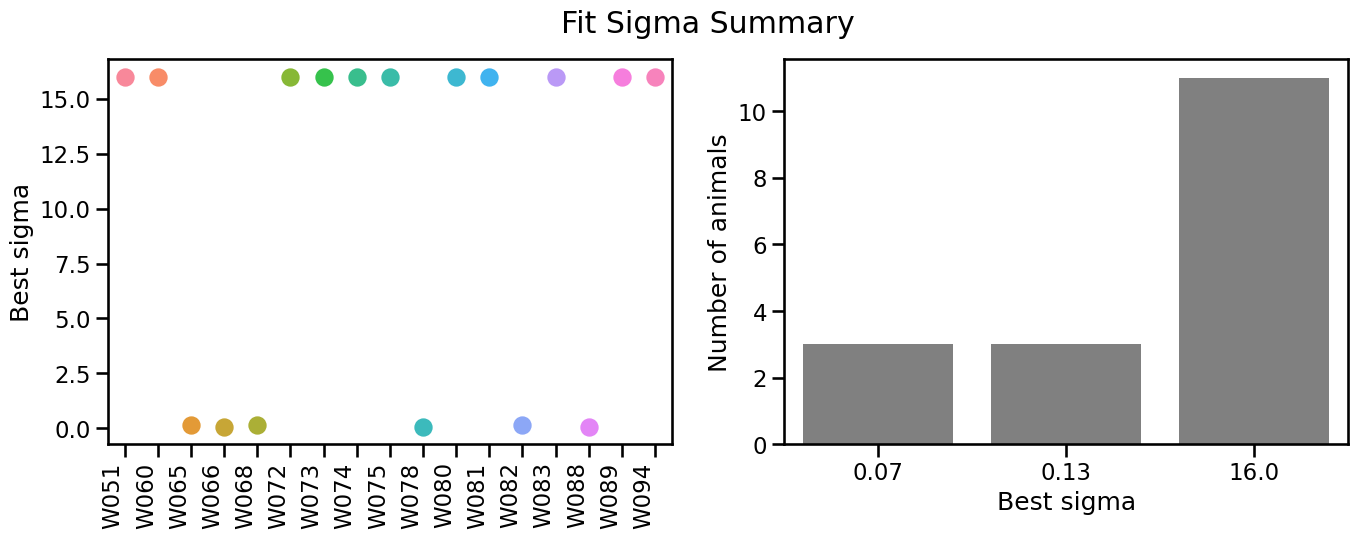

In [16]:
mv.plot_sigma_summary()

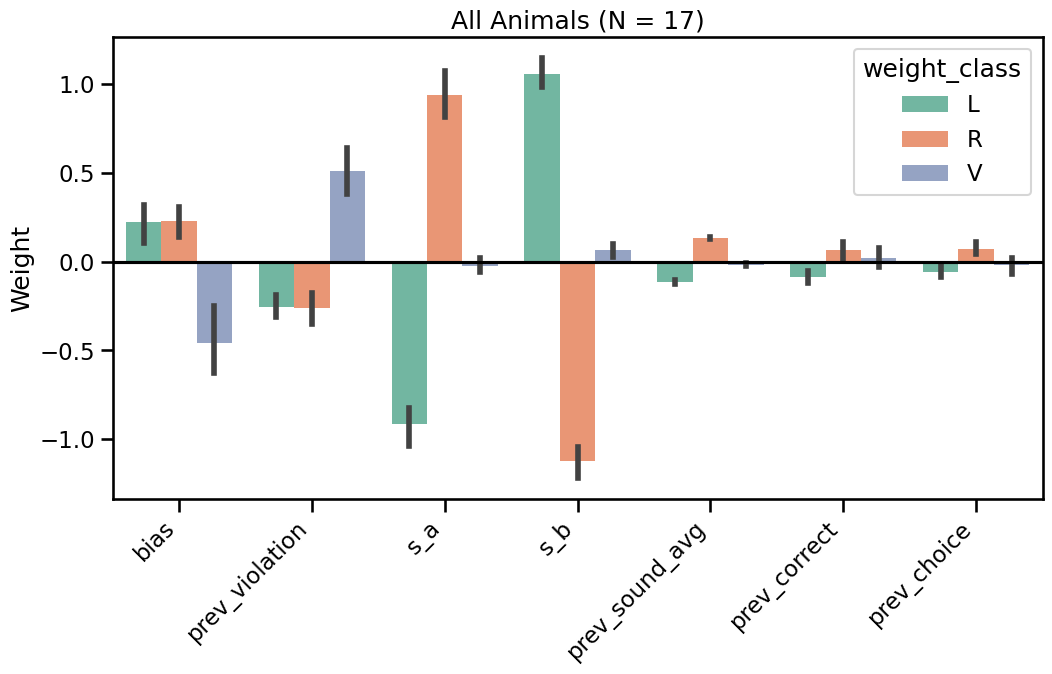

In [17]:
mv.plot_weights_summary(palette=palette)

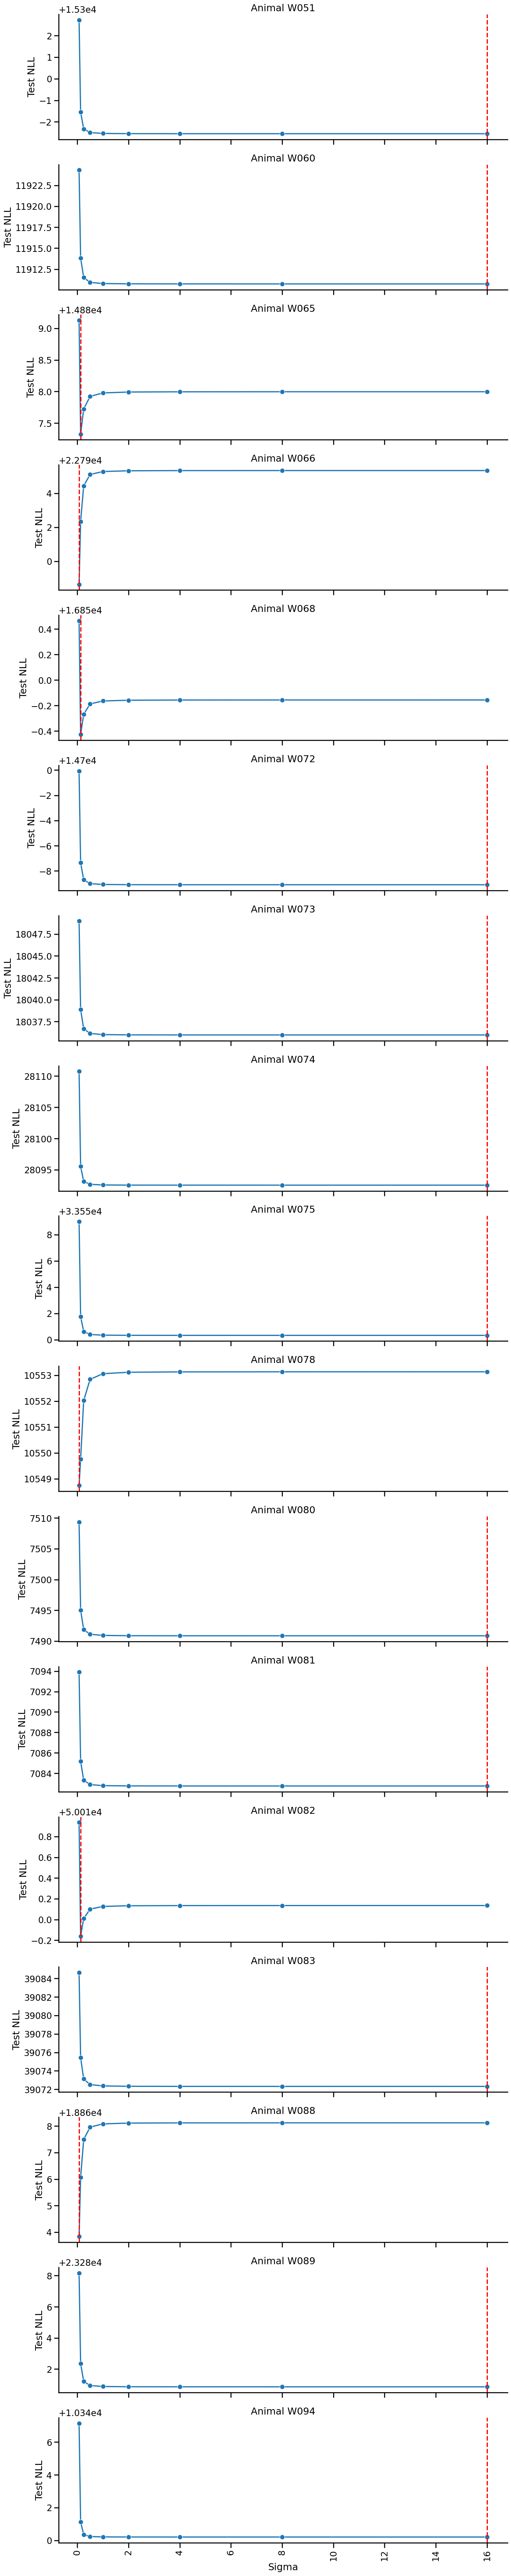

In [18]:
mv.plot_nll_over_sigmas_by_animal()

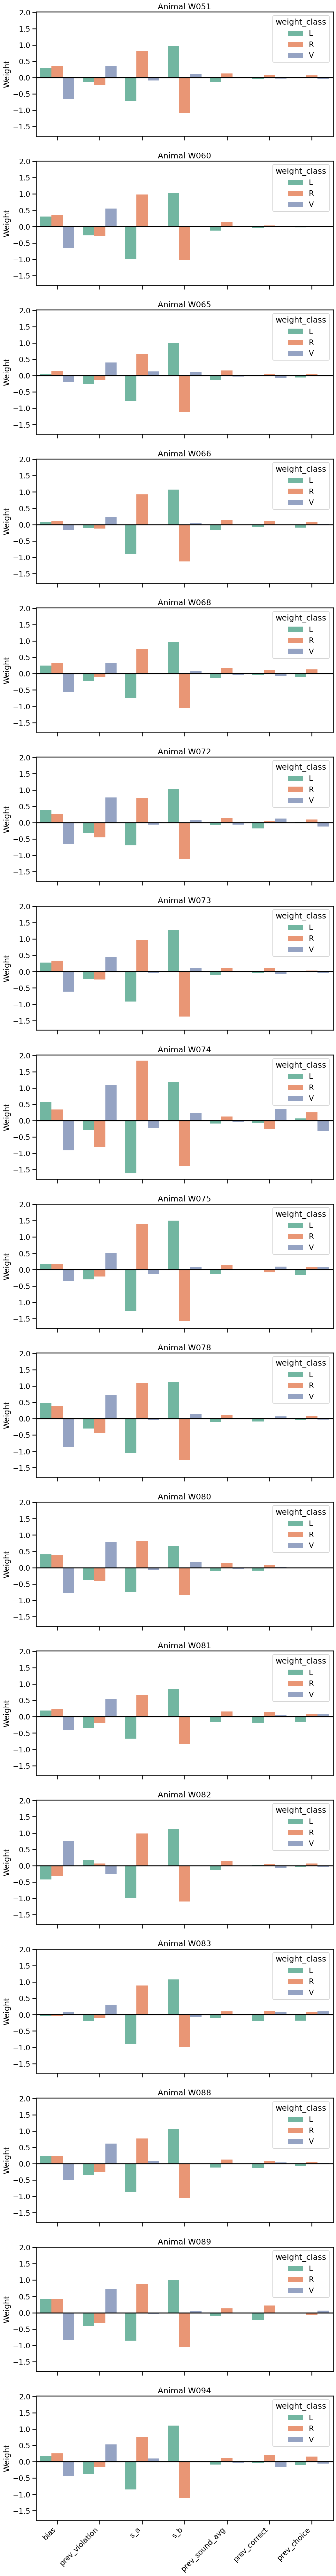

In [19]:
mv.plot_weights_by_animal(palette=palette)